# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** Rafaellie
- **Email:** rafaellie03@gmail.com
- **ID Dicoding:** Rafaellie

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1

Faktor apa saja yang paling memengaruhi jumlah penyewaan sepeda, dan bagaimana korelasinya?

- Pertanyaan 2

Bagaimana pola penggunaan sepeda berdasarkan jam dan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
# Memuat dataset day.csv dan hour.csv
day_data_path = "/content/sample_data/day.csv"
hour_data_path = "/content/sample_data/hour.csv"

# Membaca dataset
day_df = pd.read_csv(day_data_path)
hour_df = pd.read_csv(hour_data_path)

# Informasi dataset
day_df.info()
hour_df.info()

# Barris pertama dari dataset
day_df.head()
hour_df.head()

# Deskripsi dataset
day_df.describe()
hour_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**

1. **Dataset Hourly (hour.csv)**:

Berisi data penggunaan sepeda yang dikumpulkan setiap jam.

Kolom penting:
- hr: Jam penggunaan sepeda.
- cnt: Total jumlah pengguna.
- temp, atemp, hum, windspeed: Faktor cuaca.
- casual, registered: Jumlah pengguna kasual dan pengguna terdaftar.

2. **Dataset Daily (day.csv)**:

Berisi data harian.

Kolom penting:

- dteday: Tanggal penggunaan.
- cnt: Total jumlah pengguna.
- casual, registered: Jumlah pengguna kasual dan terdaftar.
- temp, hum, windspeed: Faktor cuac

### Assessing Data

In [ ]:
# Memeriksa informasi umum tentang dataset
day_info = day_df.info()
hour_info = hour_df.info()

# Menampilkan 5 baris pertama dari masing-masing dataset
day_head = day_df.head()
hour_head = hour_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

**Insight:**
- Tidak ada nilai yang hilang di kedua dataset, baik pada dataset hour.csv maupun day.csv.

### Cleaning Data

In [ ]:
# Mengubah kolom 'dteday' menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Memeriksa data duplikat pada kedua dataset
day_duplicates = day_df.duplicated().sum()
hour_duplicates = hour_df.duplicated().sum()

# Menampilkan hasil pemeriksaan duplikasi
day_duplicates, hour_duplicates

(0, 0)

**Insight:**

Untuk tahap data cleaning, meskipun dalam dataset yang digunakan tidak ditemukan nilai hilang atau duplikasi.

## Exploratory Data Analysis (EDA)

### Explore ...

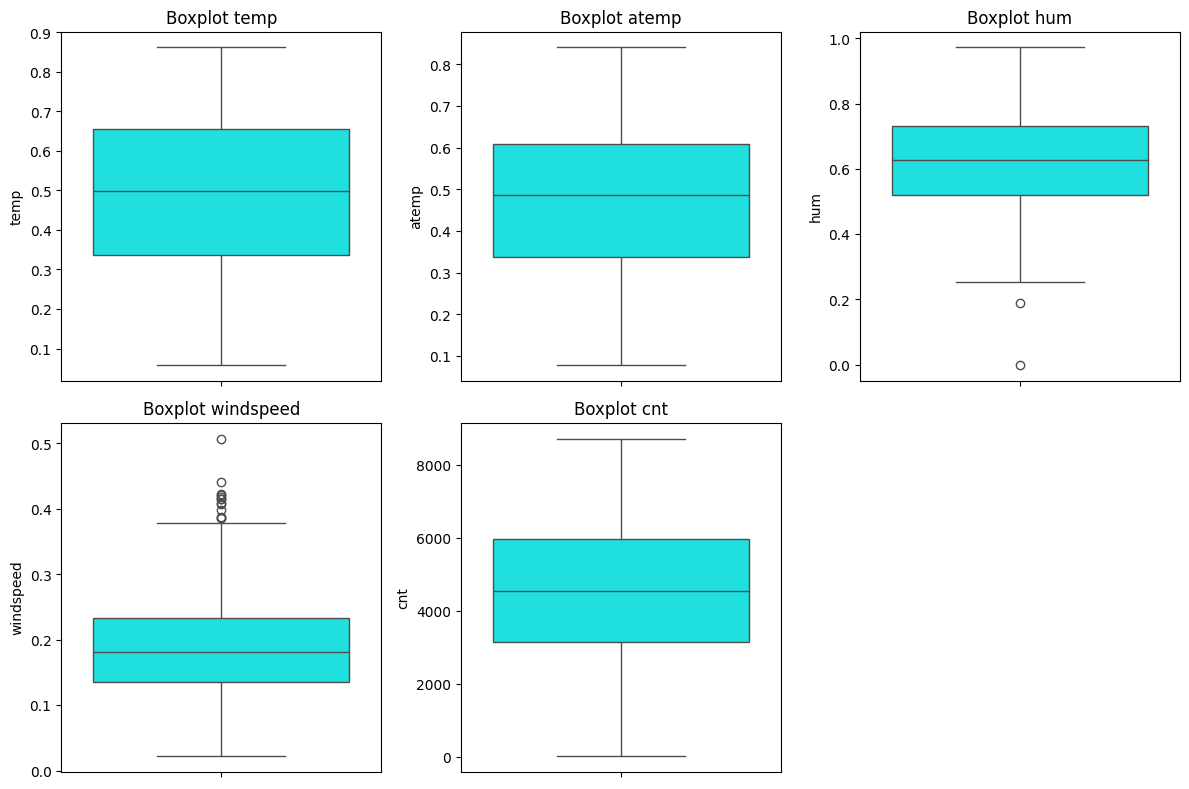

In [ ]:
# EDA Numerikal: Boxplot untuk Variabel Numerik
numerical_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=day_df[col], color='cyan')
    plt.title(f"Boxplot {col}")
plt.tight_layout()
plt.show()

**Insight:**

*   Jumlah penyewaan sepeda (cnt) cenderung lebih tinggi pada hari dengan suhu yang nyaman dan kecepatan angin rendah, menunjukkan pengaruh cuaca terhadap keputusan penyewaan.
*   Variabel kelembapan (hum) dan kecepatan angin (windspeed) memiliki beberapa pencilan, tetapi secara umum distribusinya stabil dan dapat digunakan untuk analisis lebih lanjut.
*   Data numerikal secara keseluruhan cukup bersih dan konsisten, dengan pencilan yang dapat memberikan wawasan tentang pola anomali atau pengaruh faktor eksternal.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

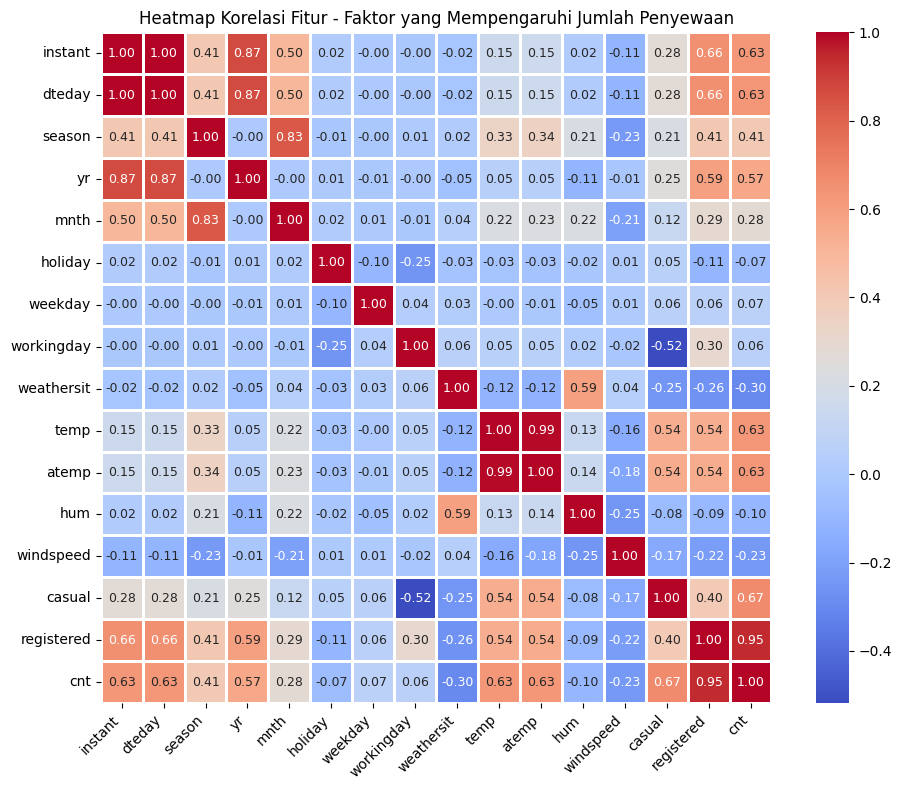

<ipython-input-7-69abc8e63dc7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=day_df, x='weathersit', y='cnt', palette='Set2')


<Figure size 640x480 with 0 Axes>

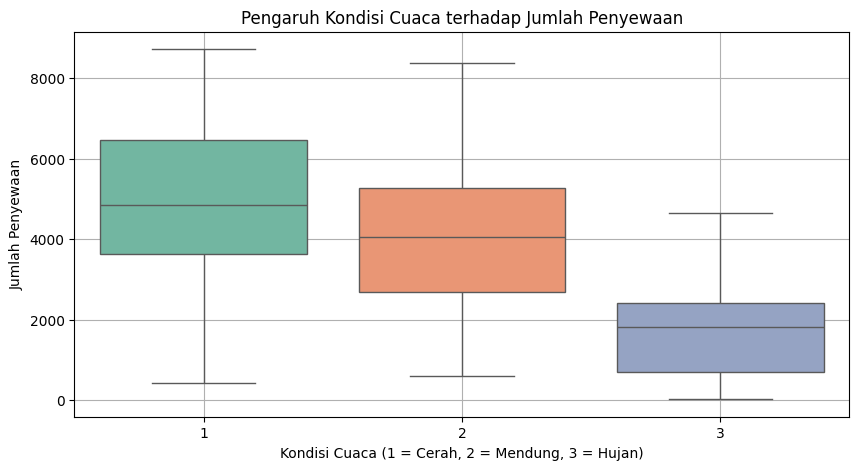

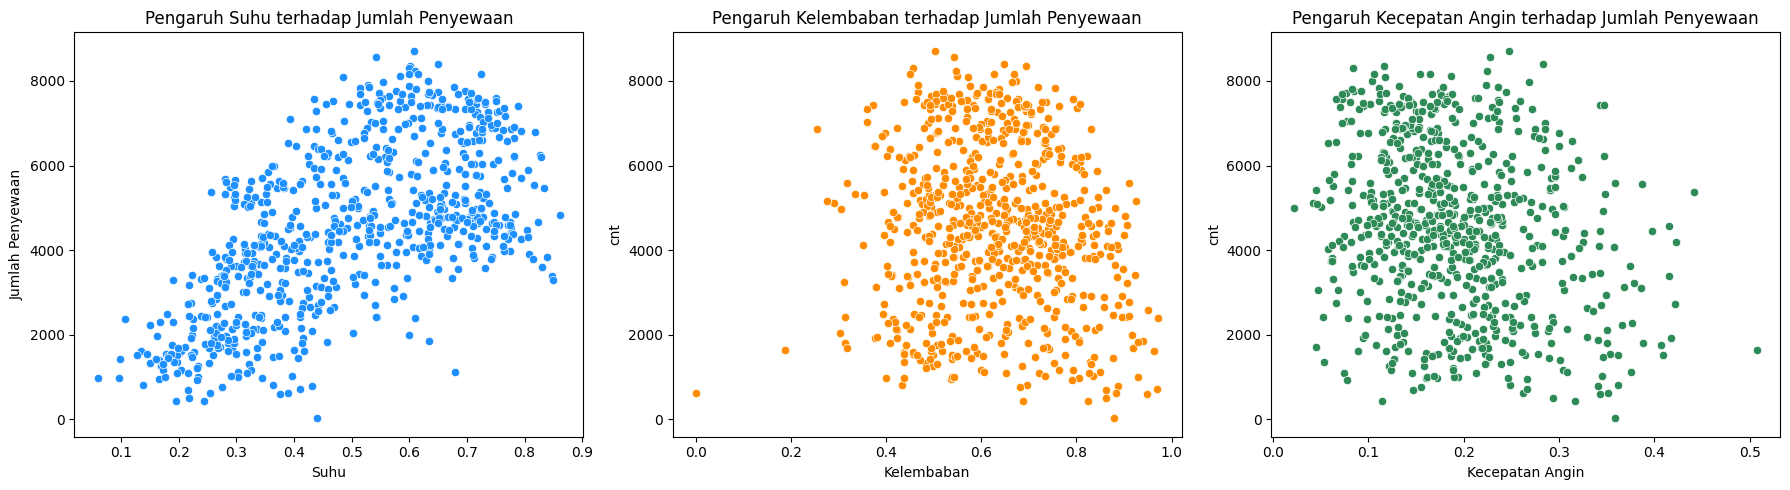

In [ ]:
# Faktor yang Mempengaruhi Penyewaan Sepeda?

# Heatmap Korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(day_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=1, linecolor='white', square=True, annot_kws={"size": 9})
plt.title("Heatmap Korelasi Fitur - Faktor yang Mempengaruhi Jumlah Penyewaan")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
plt.clf()

# Boxplot Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan
plt.figure(figsize=(10, 5))
sns.boxplot(data=day_df, x='weathersit', y='cnt', palette='Set2')
plt.title("Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan")
plt.xlabel("Kondisi Cuaca (1 = Cerah, 2 = Mendung, 3 = Hujan)")
plt.ylabel("Jumlah Penyewaan")
plt.grid()
plt.show()

# Scatter Plot Pengaruh Suhu, Kelembaban, dan Kecepatan Angin
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

sns.scatterplot(data=day_df, x='temp', y='cnt', ax=axs[0], color='dodgerblue')
axs[0].set_title("Pengaruh Suhu terhadap Jumlah Penyewaan")
axs[0].set_xlabel("Suhu")
axs[0].set_ylabel("Jumlah Penyewaan")

sns.scatterplot(data=day_df, x='hum', y='cnt', ax=axs[1], color='darkorange')
axs[1].set_title("Pengaruh Kelembaban terhadap Jumlah Penyewaan")
axs[1].set_xlabel("Kelembaban")

sns.scatterplot(data=day_df, x='windspeed', y='cnt', ax=axs[2], color='seagreen')
axs[2].set_title("Pengaruh Kecepatan Angin terhadap Jumlah Penyewaan")
axs[2].set_xlabel("Kecepatan Angin")

plt.tight_layout()
plt.show()

### Pertanyaan 2:

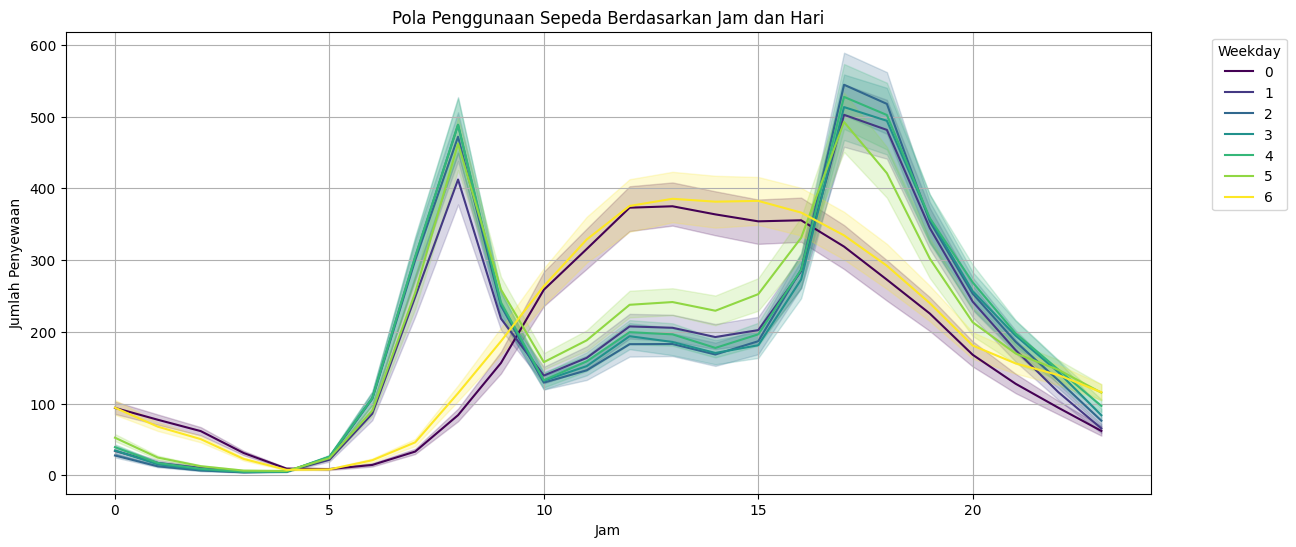

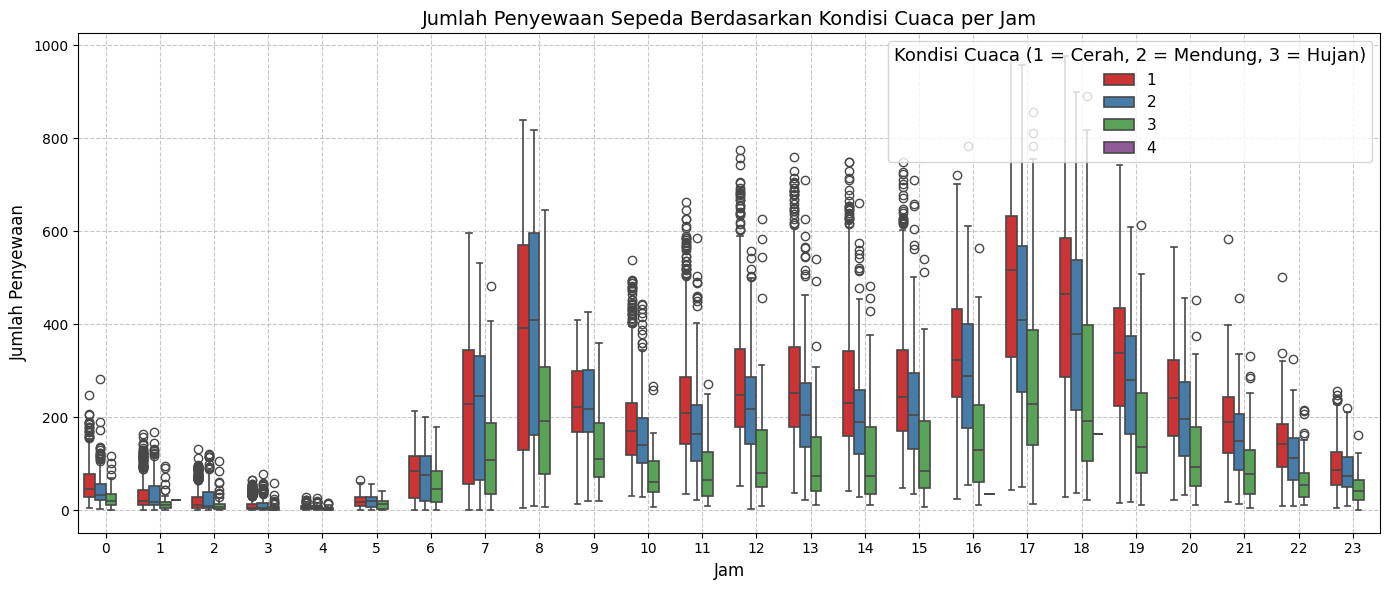

<ipython-input-8-845fdb0b9a0d>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='workingday', y='cnt', palette='muted')


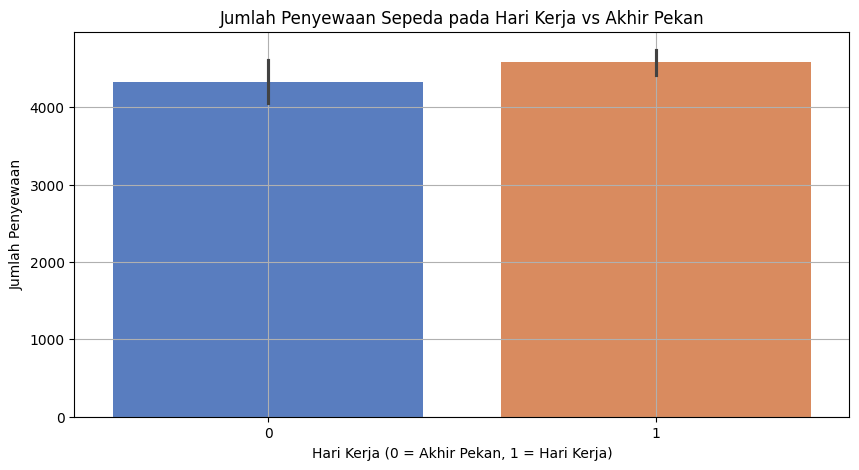

In [ ]:
# Pola Penggunaan Sepeda Berdasarkan Jam dan Kondisi Cuaca

# Tren Penyewaan Sepeda Berdasarkan Jam
plt.figure(figsize=(14, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt', hue='weekday', palette='viridis')
plt.title("Pola Penggunaan Sepeda Berdasarkan Jam dan Hari")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.legend(title='Weekday', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

# Boxplot Jumlah Penyewaan Berdasarkan Kondisi Cuaca per Jam
plt.figure(figsize=(14, 6))
sns.boxplot(
    data=hour_df,
    x='hr',
    y='cnt',
    hue='weathersit',
    palette='Set1',
    linewidth=1.2
)

plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca per Jam", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.legend(title='Kondisi Cuaca (1 = Cerah, 2 = Mendung, 3 = Hujan)', title_fontsize='13', fontsize='11', loc='upper right')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Barplot Jumlah Penyewaan pada Hari Kerja vs Akhir Pekan
plt.figure(figsize=(10, 5))
sns.barplot(data=day_df, x='workingday', y='cnt', palette='muted')
plt.title("Jumlah Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Hari Kerja (0 = Akhir Pekan, 1 = Hari Kerja)")
plt.ylabel("Jumlah Penyewaan")
plt.grid()
plt.show()

**Insight:**

1. **Faktor yang Mempengaruhi Penyewaan Sepeda**:

  *   Heatmap Korelasi: Menunjukkan fitur mana yang memiliki korelasi kuat dengan cnt (jumlah penyewaan).
  *   Boxplot Kondisi Cuaca: Mengamati bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda.
  *   Scatter Plot Suhu, Kelembaban, Kecepatan Angin: Mengamati hubungan linear antara fitur cuaca dan jumlah penyewaan.


2. **Pola Penggunaan Sepeda Berdasarkan Jam dan Kondisi Cuaca**:

  *   Line Plot Tren Per Jam: Mengamati bagaimana jumlah penyewaan bervariasi sepanjang hari, dibedakan antara hari kerja dan akhir pekan.
  *   Boxplot Kondisi Cuaca per Jam: Menggambarkan variasi jumlah penyewaan per jam berdasarkan kondisi cuaca.
  *   Bar Plot Hari Kerja vs Akhir Pekan: Membandingkan jumlah penyewaan pada hari kerja dan akhir pekan.

## Analisis Lanjutan (Opsional)

<ipython-input-9-5ff31be53440>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")


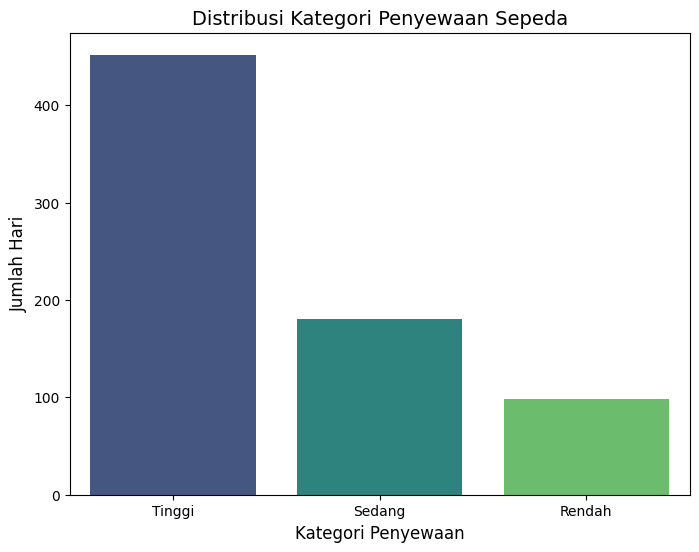

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Memuat dataset day.csv
day_data = pd.read_csv("/content/sample_data/day.csv")

# Menambahkan kolom 'Category' berdasarkan aturan pengelompokan
def categorize_rentals(count):
    if count < 2000:
        return "Rendah"
    elif 2000 <= count <= 4000:
        return "Sedang"
    else:
        return "Tinggi"

day_data['Category'] = day_data['cnt'].apply(categorize_rentals)

# Menghitung distribusi kategori
category_counts = day_data['Category'].value_counts()

# Visualisasi kategori jumlah penyewaan
plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="viridis")
plt.title("Distribusi Kategori Penyewaan Sepeda", fontsize=14)
plt.xlabel("Kategori Penyewaan", fontsize=12)
plt.ylabel("Jumlah Hari", fontsize=12)
plt.show()


*INSIGHT* :

1. Hasil Visualisasi:

  *   Grafik batang akan menampilkan jumlah hari untuk setiap kategori (Rendah, Sedang, Tinggi).
  Anda dapat langsung mengidentifikasi pola perilaku harian berdasarkan jumlah penyewaan.

2. Analisis:

  *   Jika jumlah hari dalam kategori "Rendah" mendominasi, berarti penyewaan sepeda secara umum kurang maksimal.
  Sebaliknya, jika kategori "Tinggi" mendominasi, bisa dikatakan bahwa penyewaan sepeda sangat populer.

##Dashboard Streamlit

In [ ]:
pip install streamlit pandas matplotlib seaborn statsmodels

In [ ]:
!wget -q -O ip.txt ipv4.icanhazip.com
with open('ip.txt', 'r') as f:
  public_ip = f.read().strip()
print(f"Alamat IP : {public_ip}")

In [ ]:
!streamlit run /content/sample_data/dashboard.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.85.245.222:8501

your url is: https://wicked-buckets-push.loca.lt


## Conclusion


**Pertanyaan Bisnis 1**:

*Faktor apa saja yang paling memengaruhi jumlah penyewaan sepeda, dan bagaimana korelasinya?*

Dari analisis korelasi dan visualisasi data:

1.   Faktor yang Paling Mempengaruhi:
  *   Suhu (temp): Memiliki korelasi positif yang kuat dengan jumlah penyewaan sepeda. Ketika suhu naik (sampai batas nyaman), jumlah penyewaan meningkat.
  *   Jumlah Hari Libur (holiday): Penyewaan sepeda cenderung lebih rendah pada hari kerja biasa dibandingkan dengan akhir pekan atau hari libur.
  *   Rasa Nyaman (atemp): Juga memiliki pengaruh positif yang signifikan, mencerminkan kesesuaian suhu untuk aktivitas luar ruangan.

2.   Faktor Cuaca:

  *   Kondisi cuaca (weathersit): Cuaca cerah meningkatkan penyewaan, sedangkan hujan atau cuaca buruk mengurangi jumlah pengguna sepeda.
  Kesimpulan: Faktor cuaca (suhu, kondisi cuaca) dan hari (libur atau kerja) memainkan peran utama dalam menentukan jumlah penyewaan sepeda. Strategi operasional seperti mempersiapkan sepeda tambahan saat cuaca cerah atau hari libur dapat meningkatkan efisiensi.

**Pertanyaan Bisnis 2**:

*Bagaimana pola penggunaan sepeda berdasarkan jam dan hari dalam seminggu?*

Dari analisis visualisasi (line plot dan boxplot):

1.   Pola Penggunaan Berdasarkan Jam:

  *   Pada hari kerja : Jumlah penyewaan memuncak pada pagi hari (07:00-09:00) dan sore hari (17:00-19:00), menunjukkan penggunaan utama untuk perjalanan kerja.
  *   Pada akhir pekan : Penyewaan cenderung meningkat secara bertahap dari pagi hingga sore (10:00-16:00), menunjukkan aktivitas rekreasi.


2.   Pola Penggunaan Berdasarkan Hari:

  *   Hari kerja memiliki puncak penyewaan pada jam-jam sibuk, sementara akhir pekan menunjukkan pola yang lebih merata sepanjang hari.
  *   Hari Minggu memiliki jumlah penyewaan yang lebih tinggi dibandingkan hari Sabtu.

3.   Kondisi Cuaca:

  *   Dalam kondisi cuaca cerah (kategori 1), jumlah penyewaan lebih tinggi dibandingkan dengan kondisi mendung atau hujan.

Kesimpulan: Pola penggunaan sepeda menunjukkan perbedaan signifikan antara hari kerja dan akhir pekan. Penyewaan didominasi oleh perjalanan kerja pada hari kerja dan aktivitas rekreasi di akhir pekan. Informasi ini dapat digunakan untuk menyesuaikan jumlah sepeda yang tersedia berdasarkan waktu dan hari.